In [1]:
# Data link: https://www.dropbox.com/s/fuaf0rwx526loqv/WorkshopData2016.zip?dl=0

# Ensure I don't use any local plugins. Set it to a readable folder with no Python files to avoid warnings.
%env CIS_PLUGIN_HOME=/Users/watson-parris/Pictures
%matplotlib inline

import numpy
numpy.seterr(all='ignore')
import warnings
warnings.simplefilter('ignore')

env: CIS_PLUGIN_HOME=/Users/watson-parris/Pictures


# CIS User workshop

## CIS as a Python library

* CIS is built on the Iris library and extends it to easily read and compare a wide range of observational datasets
* Our interface closely follows the Iris interfaces to allow easy interopability

### What is Iris?

* Iris is a Python library to make working with meteorological, oceanographic and climate data easier
* A community software package, led by a team at the Met Office with external contributors
* It has been evolving over the last 4 or 5 years and is now at version 1.10
* Lots of ongoing development and there is good support available

### Why use CIS/Iris?

 * It keeps all of your arrays together in one place - the data, the coordinates etc.
 * It takes care of metadata - less chance of making a mistake
 * It takes care of the layout of your data (which dimensions are which)
 * Can load data from a variety of formats including NetCDF, PP and GRIB
 * Convenient plotting functionality

## Gridded and ungridded data

The data objects in CIS are either GriddedData (an Iris Cube) or UngriddedData. They are very similar, and both contain data and metadata about a single phenomenon.

Where possible these follow the *Climate and Forecast (CF) Metadata Conventions*.

Each of these objects has:

 * A data array (typically a NumPy array).
 * A "name", preferably a CF "standard name" to describe the phenomenon that the cube represents.
 * A collection of coordinates to describe each of the dimensions of the data array. These coordinates are split into two types:
    * Dimensioned coordinates are numeric, monotonic and represent a single dimension of the data array. There may be only one dimensioned coordinate per data dimension.
    * Auxilliary coordinates can be of any type, including discrete values such as strings, and may represent more than one data dimension.

A more complete explanation is available in the [Iris user guide](http://scitools.org.uk/iris/docs/latest/userguide/iris_cubes.html).

Let's take a simple example to demonstrate the concept.

Suppose we have a ``(4, 3, 6)`` NumPy array:

![](./images/GriddedData_no_metadata.png)


Where dimensions 0, 1, and 2 have lengths 3, 2 and 4 respectively.

The Iris cube to represent this data may consist of:

 * a standard name of "air_temperature" and units of "kelvin"

 * a data array of shape ``(3, 2, 4)``

 * a coordinate, mapping to dimension 0, consisting of:
     * a standard name of "height" and units of "meters"
     * an array of length 3 representing the 3 height points
     
 * a coordinate, mapping to dimension 1, consisting of:
     * a standard name of "latitude" and units of "degrees"
     * an array of length 2 representing the 2 latitude points
     * a coordinate system such that the latitude points could be fully located on the globe
     
 * a coordinate, mapping to dimension 2, consisting of:
     * a standard name of "longitude" and units of "degrees"
     * an array of length 4 representing the 4 longitude points
     * a coordinate system such that the longitude points could be fully located on the globe

Pictorially the data has taken on more information than a simple array:

![](./images/GriddedData_with_metadata.png)

And similarly for Ungridded Data:

<img src="./images/ungridded_data.png" width="640"/>

## Working with data

In [2]:
import cis
import numpy as np

In [3]:
print(cis.__version__)
print(np.__version__)

1.5.2
1.11.2


Whilst it is possible to construct these data objects by hand, a far easier approach is to use the load functions to access data that already exists in a file.

There are three main load functions in CIS: ``read_data``, ``read_data_list`` and ``get_variables``.

1. **read_data** returns a single data object from the given file(s) and variable name. There will be exactly one object, or an exception will be raised.
2. **read_data_list** returns a list of data objects from the given file(s) and variable(s). 
3. **get_variables** returns a list of the names of variables that can be read from the given file(s)

The load functions all accept either a single filename or a list of filenames to load, and any of the filenames can be "glob" patterns (http://docs.python.org/2/library/glob.html).

First unzip your example data to a folder you can easily find it.

In [58]:
data_path = '/Users/watson-parris/Dropbox/Work/CIS/User workshop/WorkshopData2017/'

model_aod = cis.read_data(data_path + "od550aer.nc", "od550aer")
number_concentration = cis.read_data(data_path + 'ARCPAC_2008', 
                                 'NUMBER_CONCENTRATION')

In [5]:
print(model_aod)

od550aer / (1)                      (time: 1464; latitude: 96; longitude: 192)
     Dimension coordinates:
          time                           x               -              -
          latitude                       -               x              -
          longitude                      -               -              x
     Attributes:
          CDI: Climate Data Interface version 1.6.9 (http://mpimet.mpg.de/cdi)
          CDO: Climate Data Operators version 1.6.9 (http://mpimet.mpg.de/cdo)
          Conventions: CF-1.0
          advection: Lin & Rood
          date_time: 20140613 051140
          echam_version: 6.1.00
          grid_type: gaussian
          history: Fri Dec 04 17:15:40 2015: cdo -r copy od550aer.nc ../../temp.nc
Tue Jul...
          host_name: p101
          institution: Max-Planck-Institute for Meteorology
          jsbach_version: 2.01
          operating_system: AIX 6.1 Power6
          physics: Modified ECMWF physics
          radiation: Modified ECMWF rad

In [6]:
print(number_concentration)

Ungridded data: NUMBER_CONCENTRATION / (#/cm3) 
     Shape = (1268,)

     Total number of points = 1268
     Number of non-masked points = 981
     Long name = 
     Standard name = None
     Units = #/cm3
     Missing value = -9999
     Range = (17.0, 2191.0)
     History = 
     Misc attributes: 
       Missing_Value = -9999
     Coordinates: 
       TIME
          Long name = 
          Standard name = time
          Units = days since 1600-01-01 00:00:00
          Missing value = -9999
          Range = (2008-04-11 20:01:30, 2008-04-16 03:03:30)
          History = 
          Misc attributes: 
            Missing_Value = -9999
       LATITUDE
          Long name = 
          Standard name = latitude
          Units = degrees
          Missing value = -9999
          Range = (63.303199999999997, 75.128600000000006)
          History = 
          Misc attributes: 
            Missing_Value = -9999
       LONGITUDE
          Long name = 
          Standard name = longitude
          

On the command line:

`cis info ARCPAC_2008:NUMBER_CONCENTRATION`

## Attributes and methods

To access the underlying data array the ``data`` property exists. This is either a NumPy array or in some cases a NumPy masked array. 

It is important to note that for most of the supported filetypes the data isn't actually loaded until you request it via this property (either directly or indirectly). After you've accessed the data once, it is stored internally and thus won't be loaded from disk again.

The ``standard_name``, ``long_name`` and to an extent ``var_name`` are all attributes to describe the phenomenon that the object represents. The ``name()`` method is a convenience that returns the first non-empty attributes in the order they are listed above. 

In [8]:
print(model_aod.standard_name)
print(model_aod.long_name)
print(model_aod.var_name)
print(model_aod.name())

None
Optical thickness - total 550nm
od550aer
od550aer


The ``units`` attribute tells us the units of the numbers held in the data array. We can manually change the units, or better, we can convert to another unit using the ``convert_units`` method, which will automatically update the data array.

In [59]:
# First we have to clean the units!
print(type(number_concentration.units))
number_concentration.units = 'cm-3'
print(type(number_concentration.units))

<class 'str'>
<class 'cf_units.Unit'>


In [9]:
print(number_concentration.data.max(), number_concentration.units)
number_concentration.convert_units('m-3')
print(number_concentration.data.max(), number_concentration.units)

2191.0 cm-3
2191000000.0 m-3


You can also access the metadata directly using the ``metadata`` attribute

In [10]:
print(number_concentration.metadata)
print(number_concentration.metadata.misc['missing_value'])

     Long name = 
     Standard name = None
     Units = m-3
     Missing value = -9999
     Range = (17.0, 2191.0)
     History = 
     Misc attributes: 
       Missing_Value = -9999

-9999


## Coordinates

As we've seen, we need coordinate information to help us describe the underlying phenomenon. Typically the coordinates are accessed with the ``coords`` or ``coord`` methods. The latter *must* return exactly one coordinate for the given parameter filters, where the former returns a list of matching coordinates, possibly of length 0.

For example, to access the time coordinate, and print the first 3 times:

In [11]:
time = model_aod.coord('time')
print(time[:3])

DimCoord([2008-01-01 00:00:00, 2008-01-01 06:00:00, 2008-01-01 12:00:00], standard_name='time', calendar='gregorian', var_name='time')


The coordinate interface is very similar to that of the original data object. The attributes that exist in both cases are: ``standard_name``, ``long_name``, ``var_name``, ``units``, ``attributes`` and ``shape``. Similarly, the ``name()``, ``rename()`` and ``convert_units()`` methods also exist on a coordinate.

A coordinate does not have ``data``, instead it has ``points`` and ``bounds`` (``bounds`` may be ``None``). In CIS, time coordinates are currently represented as "days since an epoch":

In [12]:
print(repr(time.units))
print(time.points[:3])
print(time.bounds)

Unit('days since 1600-01-01 00:00:00', calendar='gregorian')
[ 149019.    149019.25  149019.5 ]
None


Sometimes it is desirable to add bounds to a coordinate that doesn't have any. 

The ``guess_bounds`` method on a coordinate is useful in this regard. 

For example, the time coordinate previously obtained does not have bounds, but we can either set some manually, or use the ``guess_bounds`` method:

In [13]:
print(time.points[:3])
print(time.bounds)
if time.bounds is None:
    time.guess_bounds()
print(time.bounds[:3])

[ 149019.    149019.25  149019.5 ]
None
[[ 149018.875  149019.125]
 [ 149019.125  149019.375]
 [ 149019.375  149019.625]]


These numbers can be converted to datetime objects with the unit's ``num2date`` method. Dates can be converted back again with the ``date2num`` method:

In [14]:
import datetime

print(time.units.num2date(time.points[:3]))
print(time.units.date2num(datetime.datetime(1970, 2, 1)))

[datetime.datetime(2008, 1, 1, 0, 0) datetime.datetime(2008, 1, 1, 6, 0)
 datetime.datetime(2008, 1, 1, 12, 0)]
135171.0


### Exercise 1

1\. Read the variables in the Aeronet file ``920801_150530_Brussels.lev20`` and load the AOD at all wavelengths.

2\. Loop through each of the datasets (e.g. ``for d in datasets``) and print the mean of each.

3\. Print the names of all coordinates on one of the datasets. (Hint: Remember the `coords` method without any keywords will give us all of the coordinates)

## Saving 

The ``save_data`` method provides a convenient interface to save data to disk:

In [15]:
aeronet_aot_500 = cis.read_data(data_path + "Aeronet/920801_150530_Brussels.lev20",
                            "AOT_500")

In [16]:
aeronet_aot_500.save_data('saved_aeronet.nc')

In [17]:
!/Users/watson-parris/anaconda/envs/python_workshop/bin/ncdump -h saved_aeronet.nc
!rm saved_aeronet.nc

netcdf saved_aeronet {
dimensions:
	obs = 15573 ;
variables:
	double longitude(obs) ;
		longitude:standard_name = "longitude" ;
		longitude:units = "degrees_east" ;
	double latitude(obs) ;
		latitude:standard_name = "latitude" ;
		latitude:units = "degrees_north" ;
	double altitude(obs) ;
		altitude:standard_name = "altitude" ;
		altitude:units = "meters" ;
	double time(obs) ;
		time:standard_name = "time" ;
		time:units = "days since 1600-01-01 00:00:00" ;
		time:calendar = "gregorian" ;
	double AOT_500(obs) ;
		AOT_500:_FillValue = -999. ;
		AOT_500:units = "1" ;
		AOT_500:long_name = "AOT_500" ;
		AOT_500:missing_value = -999. ;

// global attributes:
		:source = "CIS1.5.2" ;
}


### Indexing

We can also index in a familiar manner to that of NumPy arrays:

In [18]:
sub_model_aod = model_aod[..., 15:35, :10]
print(sub_model_aod)

Optical thickness - total 550nm / (1) (time: 1464; latitude: 20; longitude: 10)
     Dimension coordinates:
          time                             x               -              -
          latitude                         -               x              -
          longitude                        -               -              x
     Attributes:
          CDI: Climate Data Interface version 1.6.9 (http://mpimet.mpg.de/cdi)
          CDO: Climate Data Operators version 1.6.9 (http://mpimet.mpg.de/cdo)
          Conventions: CF-1.0
          advection: Lin & Rood
          date_time: 20140613 051140
          echam_version: 6.1.00
          grid_type: gaussian
          history: Fri Dec 04 17:15:40 2015: cdo -r copy od550aer.nc ../../temp.nc
Tue Jul...
          host_name: p101
          institution: Max-Planck-Institute for Meteorology
          jsbach_version: 2.01
          operating_system: AIX 6.1 Power6
          physics: Modified ECMWF physics
          radiation: Modified EC

In [19]:
sub_number_concentration = number_concentration[143:-23]
print(sub_number_concentration)

Ungridded data: NUMBER_CONCENTRATION / (m-3) 
     Shape = (1102,)

     Total number of points = 1102
     Number of non-masked points = 913
     Long name = 
     Standard name = None
     Units = m-3
     Missing value = -9999
     Range = (16999999.999999996, 1210999999.9999998)
     History = 
     Misc attributes: 
       Missing_Value = -9999
     Coordinates: 
       TIME
          Long name = 
          Standard name = time
          Units = days since 1600-01-01 00:00:00
          Missing value = -9999
          Range = (2008-04-11 22:24:30, 2008-04-16 02:40:30)
          History = 
          Misc attributes: 
            Missing_Value = -9999
       LATITUDE
          Long name = 
          Standard name = latitude
          Units = degrees
          Missing value = -9999
          Range = (63.303199999999997, 75.128600000000006)
          History = 
          Misc attributes: 
            Missing_Value = -9999
       LONGITUDE
          Long name = 
          Standard name 

Note: the result of indexing is *always* a copy and never a *view* on the original data.

# Plotting with CIS

### Ungridded time series data

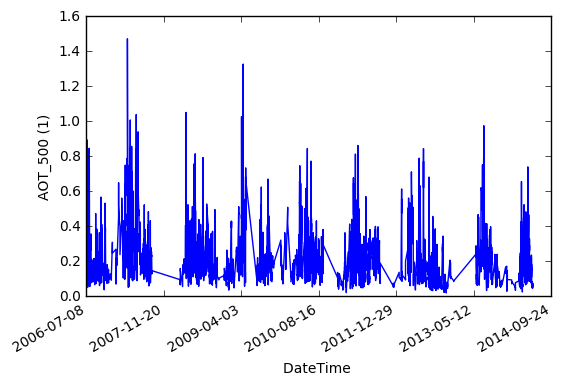

In [20]:
aeronet_aot_500.plot()

`cis plot AOT_500:Aeronet/920801_150530_Brussels.lev20`

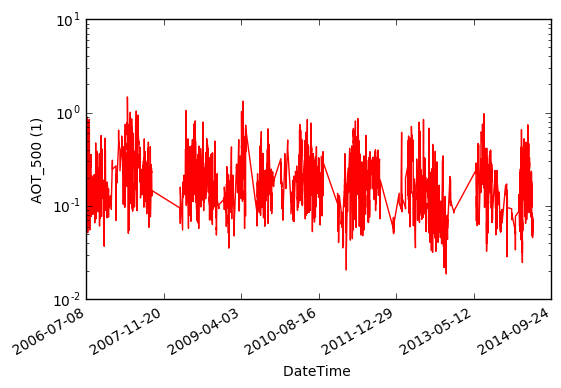

In [21]:
ax = aeronet_aot_500.plot(color='red')
ax.set_yscale('log')

`cis plot AOT_500:Aeronet/920801_150530_Brussels.lev20 --logy --color red`

UngriddedDataList: 
0: Ungridded data: AOT_500 / (1) 
1: Ungridded data: AOT_675 / (1) 
Coordinates: 
  Longitude
  Latitude
  Altitude
  DateTime



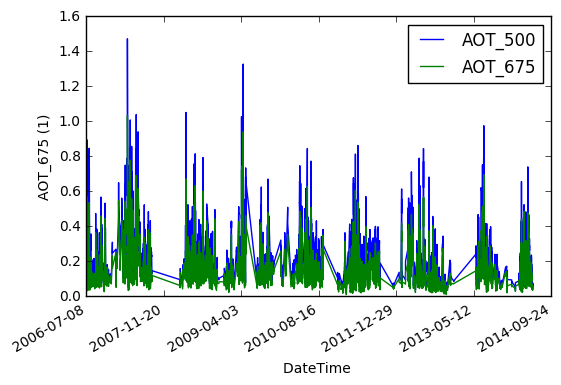

In [22]:
aeronet_aot = cis.read_data_list(data_path + "Aeronet/920801_150530_Brussels.lev20", 
                             ['AOT_500', 'AOT_675'])
print(aeronet_aot)
aeronet_aot.plot()

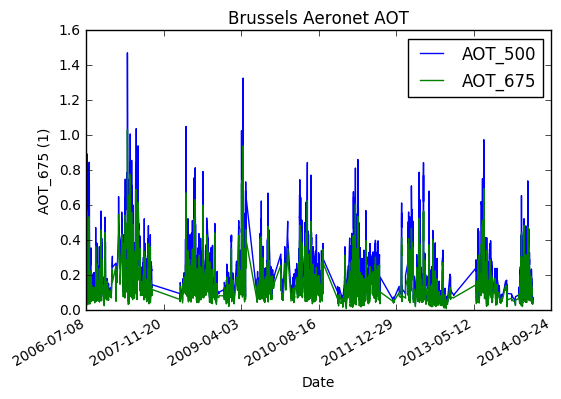

In [23]:
ax = aeronet_aot.plot()
ax.set_title('Brussels Aeronet AOT')
ax.set_xlabel('Date') 

`CIS plot AOT_500:Aeronet/920801_150530_Brussels.lev20 
          AOT_675:Aeronet/920801_150530_Brussels.lev20 --logy --type line
          --title 'Brussels Aeronet AOT' --xlabel 'Date'`

(732801.0, 732914.0)

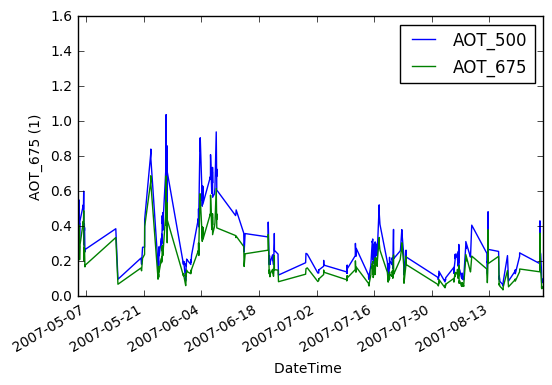

In [24]:
from datetime import datetime 
ax = aeronet_aot.plot()
ax.set_xlim(datetime(2007,5,5), datetime(2007,8,26))    

`cis plot AOT_500:Aeronet/920801_150530_Brussels.lev20 
          AOT_675:Aeronet/920801_150530_Brussels.lev20 --xmin 2008-01-01 --xmax 2008-12-31`

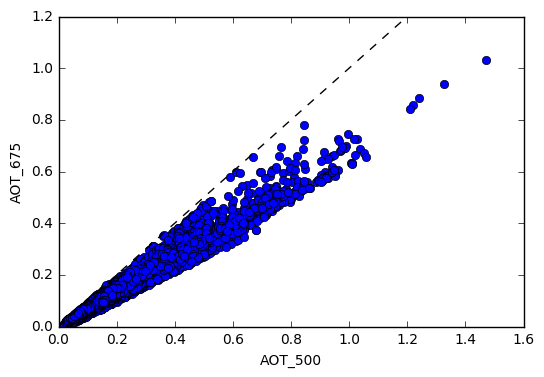

In [25]:
aeronet_aot.plot(how='comparativescatter')
# Note that this will only work if we have two datasets in our list

`cis plot AOT_500:Aeronet/920801_150530_Brussels.lev20 
          AOT_675:Aeronet/920801_150530_Brussels.lev20 --type comparativescatter`

### Subsetting

CIS is able to `subset` datasets across any of the given coordinates

In [26]:
aeronet_aot_2007 = aeronet_aot_500.subset(t=[datetime(2007,1,1), 
                                             datetime(2007,12,31)])
print(aeronet_aot_2007)

Ungridded data: AOT_500 / (1) 
     Shape = (2051,)

     Total number of points = 2051
     Number of non-masked points = 2051
     Long name = AOT_500
     Standard name = None
     Units = 1
     Missing value = -999.0
     Range = (0.050959999999999998, 1.4709920000000001)
     History = 2017-03-16T20:33:05Z Subsetted using limits: DateTime: [148654.0, 149018.0]
     Coordinates: 
       Longitude
          Long name = 
          Standard name = longitude
          Units = degrees_east
          Missing value = None
          Range = (4.3499999999999996, 4.3499999999999996)
          History = 
       Latitude
          Long name = 
          Standard name = latitude
          Units = degrees_north
          Missing value = None
          Range = (50.783000000000001, 50.783000000000001)
          History = 
       Altitude
          Long name = 
          Standard name = altitude
          Units = meters
          Missing value = None
          Range = (120.0, 120.0)
          Hist

`cis subset AOT_500:Aeronet/920801_150530_Brussels.lev20 -t 2007`

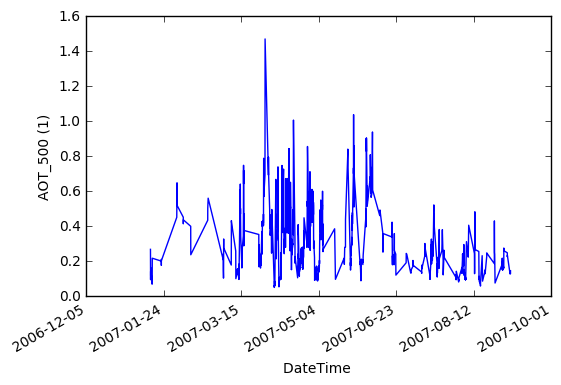

In [27]:
aeronet_aot_2007.plot()

### Model time series

In [28]:
maod_global_mean, = model_aod.collapsed(['longitude', 'latitude'], 'mean')

`cis collapse od550aer:od550aer.nc x,y`

In [29]:
print(maod_global_mean)

od550aer / (1)                      (time: 1464)
     Dimension coordinates:
          time                           x
     Scalar coordinates:
          latitude: 0.0 degrees, bound=(-89.4969872937, 89.4969872937) degrees
          longitude: 179.0625 degrees, bound=(-0.9375, 359.0625) degrees
     Attributes:
          CDI: Climate Data Interface version 1.6.9 (http://mpimet.mpg.de/cdi)
          CDO: Climate Data Operators version 1.6.9 (http://mpimet.mpg.de/cdo)
          Conventions: CF-1.0
          advection: Lin & Rood
          date_time: 20140613 051140
          echam_version: 6.1.00
          grid_type: gaussian
          history: Fri Dec 04 17:15:40 2015: cdo -r copy od550aer.nc ../../temp.nc
Tue Jul...
          host_name: p101
          institution: Max-Planck-Institute for Meteorology
          jsbach_version: 2.01
          operating_system: AIX 6.1 Power6
          physics: Modified ECMWF physics
          radiation: Modified ECMWF radiation
          title: AEROCOM


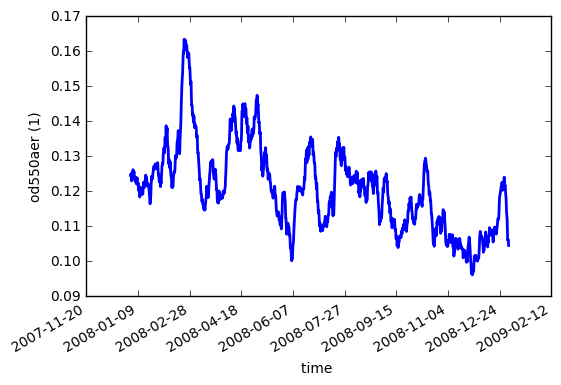

In [30]:
ax = maod_global_mean.plot(itemwidth=2)

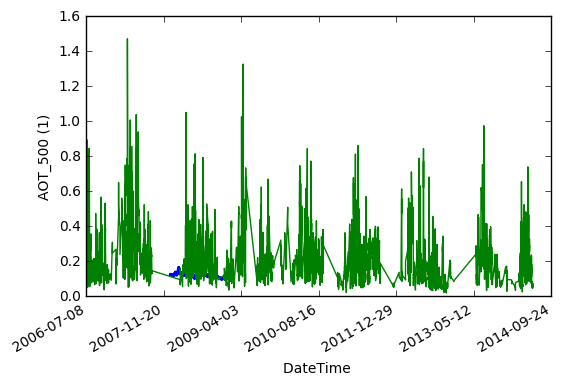

In [31]:
ax = maod_global_mean.plot(itemwidth=2)
aeronet_aot_500.plot(ax=ax)

### Aircraft data

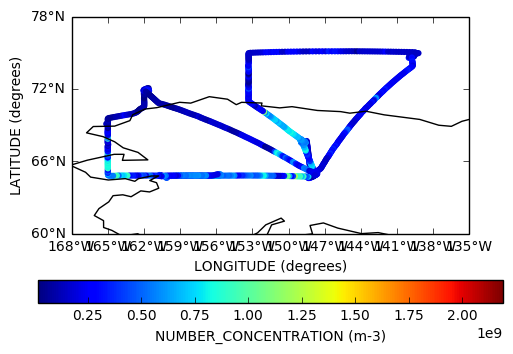

In [32]:
ax = number_concentration.plot()

`cis plot NUMBER_CONCENTRATION:ARCPAC_2008`

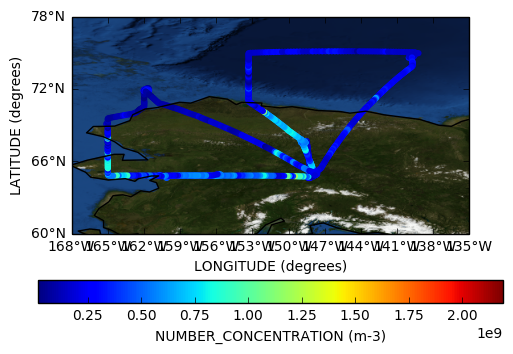

In [33]:
ax = number_concentration.plot()
ax.bluemarble() 

`cis plot NUMBER_CONCENTRATION:ARCPAC_2008 --nasabluemarble`


### Satellite data

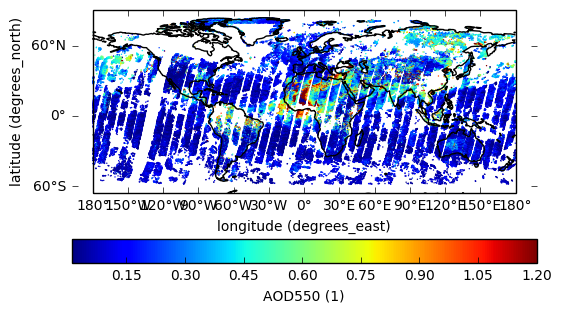

In [34]:
aerosol_cci = cis.read_data(data_path+'AerosolCCI', 
                        'AOD550')
aerosol_cci[::10].plot(itemwidth=1, vmax=1.2)

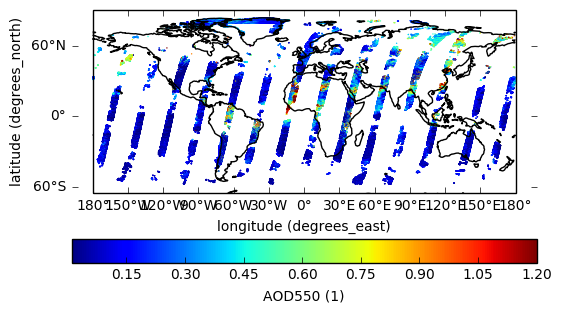

In [35]:
aerosol_cci_one_day = cis.read_data(data_path + 
                                'AerosolCCI/20080415*.nc', 
                                'AOD550')
ax = aerosol_cci_one_day.plot(itemwidth=1, vmax=1.2)

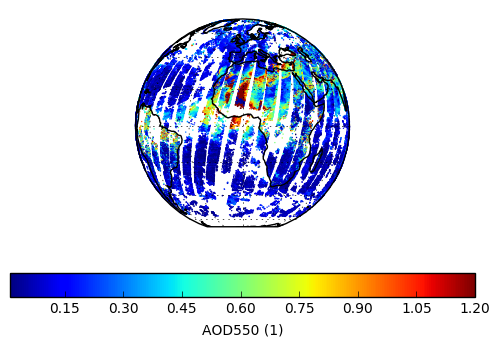

In [36]:
aerosol_cci[::10].plot(projection='Orthographic',
                 itemwidth=1, vmax=1.2)

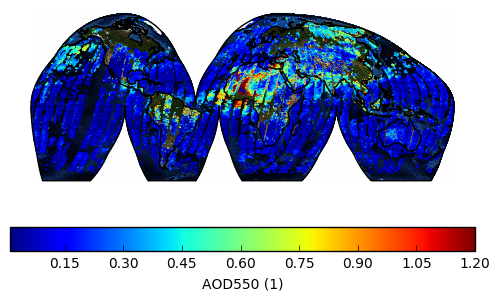

In [37]:
ax=aerosol_cci[::10].plot(projection='InterruptedGoodeHomolosine',
                           itemwidth=1, vmax=1.2)
ax.bluemarble()

## Aggregation

Given a set of UngriddedData...

<img src="./images/ungridded_aggregation_1.png" width="640"/>

... we can perform an aggregation over a specified grid...

<img src="./images/ungridded_aggregation_2.png" width="640"/>

... to create a new GriddedData object (which is essentiall an Iris Cube)

<img src="./images/ungridded_aggregation_3.png" width="640"/>

In [38]:
g_aerosol_cci_one_day = aerosol_cci.aggregate(x=[-180,180,10],
                                              y=[-90,90,5])

`cis aggregate AOD550:AerosolCCI/*.nc 
                x=[-180,180,10],y=[-90,90,5]`

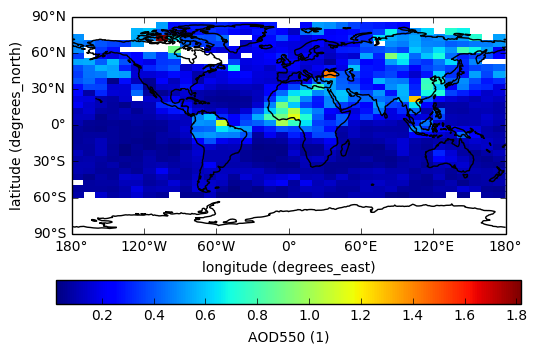

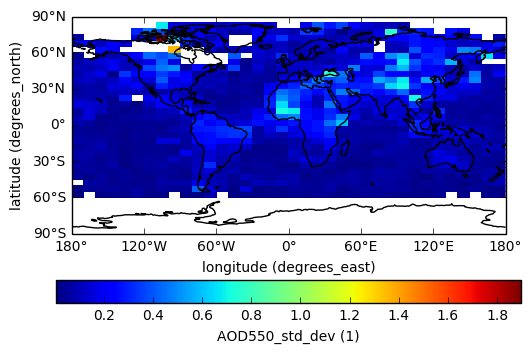

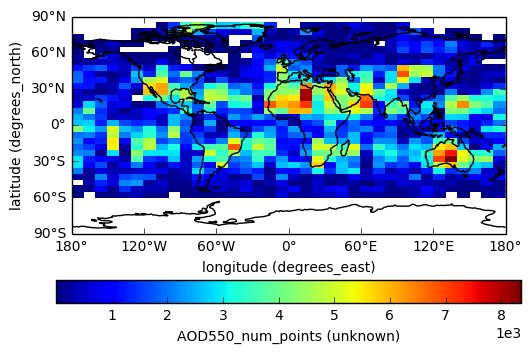

In [39]:
for d in g_aerosol_cci_one_day:
    d.plot()

## Exercises

**1.** Read in ``AOD550`` and ``AOD670`` from the 5 days of satellite data 

**2.** Subset this data down to the region covered by the aircraft data

**3.** Try plotting ``AOD550`` against ``AOD670`` from the subsetted satellite data using a comparative scatter plot


## Collocation

See powerpoint notes on sampling and collocation options

### Model onto Aeronet

<img src="./images/model_onto_aeronet.png" width="640"/>

This is an gridded onto un-gridded collocation and can be done using either linear interpolation or nearest neighbour.

This is very quick and in general CIS can even handle hybrid height coordinates: 

<img src="./images/gridded_ungridded_collocation.png" width="640"/>

In [40]:
# Lets take a closer look at the model data
print(model_aod)

od550aer / (1)                      (time: 1464; latitude: 96; longitude: 192)
     Dimension coordinates:
          time                           x               -              -
          latitude                       -               x              -
          longitude                      -               -              x
     Attributes:
          CDI: Climate Data Interface version 1.6.9 (http://mpimet.mpg.de/cdi)
          CDO: Climate Data Operators version 1.6.9 (http://mpimet.mpg.de/cdo)
          Conventions: CF-1.0
          advection: Lin & Rood
          date_time: 20140613 051140
          echam_version: 6.1.00
          grid_type: gaussian
          history: Fri Dec 04 17:15:40 2015: cdo -r copy od550aer.nc ../../temp.nc
Tue Jul...
          host_name: p101
          institution: Max-Planck-Institute for Meteorology
          jsbach_version: 2.01
          operating_system: AIX 6.1 Power6
          physics: Modified ECMWF physics
          radiation: Modified ECMWF rad

In [41]:
from cis.time_util import PartialDateTime
# First subset the aeronet data:
aeronet_aot_2008 = aeronet_aot_500.subset(t=PartialDateTime(2008))

Note that we don’t actually have to do this subsetting, but that otherwise CIS will interpolate the nearest values, which in this case we don’t really want.

In [42]:
# Now do the collocation:
model_aod_onto_aeronet = model_aod.collocated_onto(aeronet_aot_2008)

`cis collocate od550aer:od550aer.nc aot_500_brussels_2008.nc`

In [43]:
print(model_aod_onto_aeronet[0])

Ungridded data: od550aer / (1) 
     Shape = (1885,)

     Total number of points = 1885
     Number of non-masked points = 1885
     Long name = Optical thickness - total 550nm
     Standard name = None
     Units = 1
     Missing value = nan
     Range = (0.02192891966422272, 1.6932252635449034)
     History = 2017-03-16T20:34:02Z Collocated onto sampling from: [] 
using CIS version 1.5.2 
variables: od550aer 
with files: ['/Users/watson-parris/Dropbox/Work/CIS/User workshop/WorkshopData2017/od550aer.nc'] 
using collocator: <cis.collocation.col_implementations.GriddedUngriddedCollocator object at 0x11e2ad5f8> 
kernel: lin
     Coordinates: 
       Longitude
          Long name = 
          Standard name = longitude
          Units = degrees_east
          Missing value = None
          Range = (4.3500000000000227, 4.3500000000000227)
          History = 
       Latitude
          Long name = 
          Standard name = latitude
          Units = degrees_north
          Missing value =

Note the updated history

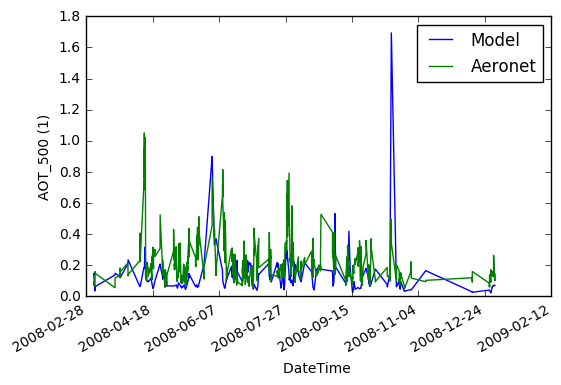

In [44]:
from cis.plotting.plot import multilayer_plot, taylor_plot
ax = multilayer_plot([model_aod_onto_aeronet[0], aeronet_aot_2008], 
                     layer_opts=[dict(label='Model'), 
                                 dict(label='Aeronet')],
                    itemwidth=1)

`cis plot od550aer:model_onto_aeronet_2008.nc:label='Model' 
          AOT_500:aot_500_brussels_2008.nc:label='Aeronet' 
              --xmin=2008-03-01 --xmax=2008-05-31 --itemwidth 1`

(<cis.plotting.taylor.Taylor at 0x11dcaaf98>,
 <matplotlib.axes._subplots.Floating AxesHostAxesSubplot at 0x1313fdcf8>)

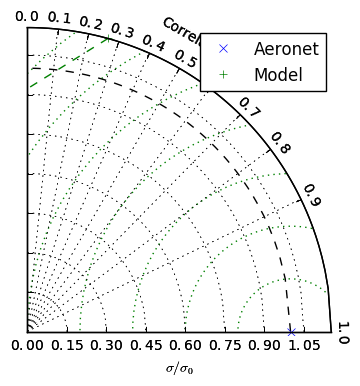

In [45]:
taylor_plot([aeronet_aot_2008, model_aod_onto_aeronet[0]], 
            layer_opts=[dict(label='Aeronet'),dict(label='Model')],
           bias='flag')

In [46]:
# Basic maths on the data
print(model_aod_onto_aeronet[0] - aeronet_aot_2008)

Ungridded data: od550aer / (1) 
     Shape = (1885,)

     Total number of points = 1885
     Number of non-masked points = 1885
     Long name = Optical thickness - total 550nm
     Standard name = None
     Units = 1
     Missing value = nan
     Range = (-0.86902314968727379, 1.3514322635449034)
     History = 2017-03-16T20:34:02Z Collocated onto sampling from: [] 
using CIS version 1.5.2 
variables: od550aer 
with files: ['/Users/watson-parris/Dropbox/Work/CIS/User workshop/WorkshopData2017/od550aer.nc'] 
using collocator: <cis.collocation.col_implementations.GriddedUngriddedCollocator object at 0x11e2ad5f8> 
kernel: lin
2017-03-16T20:34:05Z Performed unary_func operation
     Coordinates: 
       Longitude
          Long name = 
          Standard name = longitude
          Units = degrees_east
          Missing value = None
          Range = (4.3500000000000227, 4.3500000000000227)
          History = 
       Latitude
          Long name = 
          Standard name = latitude
    

`cis eval od550aer=a:model_onto_aeronet_2008.nc 
                 AOT_500=b:aot_500_brussels_2008.nc "a-b" 1 
                 -o model_minus_aeronet:model_minus_aeronet`

### Aircraft onto satellite

<img src="./images/aircraft_onto_satellite.png" width="640"/>

As you can see the difficulty here is the sparseness of the aircraft data, and actually of the satellite data in this region.

This is an ungridded to ungridded collocation:

<img src="./images/ungridded_ungridded_collocation.png" width="640" />

In [47]:
# Read all of the AOD satelite variables
aerosol_cci = cis.read_data_list(data_path + 'AerosolCCI', 'AOD*0')
aoerosol_cci_Alaska = aerosol_cci.subset(x=[-170,-130],y=[54,80])

In [48]:
print(aerosol_cci)

UngriddedDataList: 
0: Ungridded data: AOD670 / (1) 
1: Ungridded data: AOD1600 / (1) 
2: Ungridded data: AOD870 / (1) 
3: Ungridded data: AOD550 / (1) 
Coordinates: 
  longitude
  latitude
  time



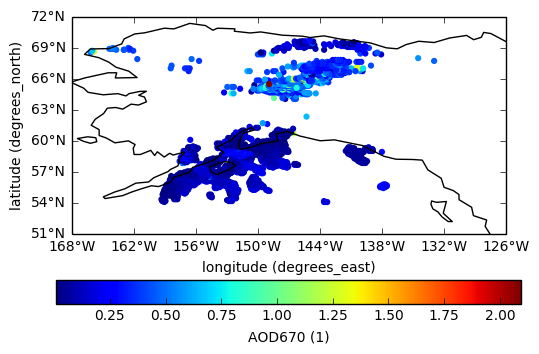

In [49]:
aoerosol_cci_Alaska[0].plot()

In [50]:
aerosol_cci_collocated = \
aoerosol_cci_Alaska.collocated_onto(number_concentration, 
                                    h_sep=10, t_sep='P1D')

In [51]:
aerosol_cci_collocated.append(number_concentration)
print(aerosol_cci_collocated)

UngriddedDataList: 
0: Ungridded data: AOD670 / (1) 
1: Ungridded data: AOD670_std_dev / (1) 
2: Ungridded data: AOD670_num_points / (unknown) 
3: Ungridded data: AOD1600 / (1) 
4: Ungridded data: AOD1600_std_dev / (1) 
5: Ungridded data: AOD1600_num_points / (unknown) 
6: Ungridded data: AOD870 / (1) 
7: Ungridded data: AOD870_std_dev / (1) 
8: Ungridded data: AOD870_num_points / (unknown) 
9: Ungridded data: AOD550 / (1) 
10: Ungridded data: AOD550_std_dev / (1) 
11: Ungridded data: AOD550_num_points / (unknown) 
12: Ungridded data: NUMBER_CONCENTRATION / (m-3) 
Coordinates: 
  TIME
  LATITUDE
  LONGITUDE
  ALTITUDE



In [52]:
aerosol_cci_collocated = aerosol_cci_collocated[::3]

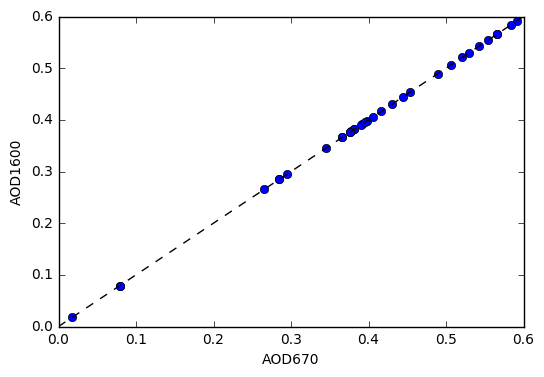

In [53]:
aerosol_cci_collocated[:2].plot('comparativescatter')

## Exercises

**1.** How does the correlation change if we only include those average number concentrations which averaged more than one point?

**2.** Consider the case of comparing our model AOD with the AerosolCCI.

**a.** What strategies could you employ?
    
**b.** Perform an initial assesment of the model AOD field using the Aerosol CCI data for the few days we have data.

## CIS and Pandas

In [54]:
df = aerosol_cci_collocated.as_data_frame()
print(df)

                     ALTITUDE  LATITUDE  LONGITUDE    AOD670   AOD1600  \
2008-04-11 20:01:30     233.4   64.8029  -147.8828  0.284781  0.284781   
2008-04-11 20:02:30     652.9   64.7594  -147.9471  0.294635  0.294635   
2008-04-11 20:03:30    1099.1   64.7385  -148.0415  0.345198  0.345198   
2008-04-11 20:04:30    1496.7   64.7820  -148.1129  0.391794  0.391794   
2008-04-11 20:05:30    1877.5   64.8434  -148.1207  0.443872  0.443872   
2008-04-11 20:06:30    2245.8   64.9073  -148.1275  0.520862  0.520862   
2008-04-11 20:07:30    2638.7   64.9720  -148.1360  0.489666  0.489666   
2008-04-11 20:08:30    3013.7   65.0354  -148.1538  0.265527  0.265527   
2008-04-11 20:09:30    3275.1   65.1007  -148.1691  0.416466  0.416466   
2008-04-11 20:10:30    3411.1   65.1700  -148.1806  0.397496  0.397496   
2008-04-11 20:11:30    3412.2   65.2419  -148.1874  0.529464  0.529464   
2008-04-11 20:12:30    3410.5   65.3126  -148.1910  0.506485  0.506485   
2008-04-11 20:13:30    3412.0   65.382

In [55]:
df.corr()
# Then do a pretty plot of it...
# This is a nice segway into the Pandas lesson.

,ALTITUDE,LATITUDE,LONGITUDE,AOD670,AOD1600,AOD870,AOD550,NUMBER_CONCENTRATION
ALTITUDE,1.000000,-0.371033,-0.036407,-0.042618,-0.042618,-0.083855,0.008630,0.518533
LATITUDE,-0.371033,1.000000,0.171710,-0.169449,-0.169449,-0.175468,-0.077648,-0.433387
LONGITUDE,-0.036407,0.171710,1.000000,0.515622,0.515622,0.404065,0.483901,-0.011983
AOD670,-0.042618,-0.169449,0.515622,1.000000,1.000000,0.846541,0.970247,-0.344245
AOD1600,-0.042618,-0.169449,0.515622,1.000000,1.000000,0.846541,0.970247,-0.344245
AOD870,-0.083855,-0.175468,0.404065,0.846541,0.846541,1.000000,0.909970,-0.295922
AOD550,0.008630,-0.077648,0.483901,0.970247,0.970247,0.909970,1.000000,-0.320531
NUMBER_CONCENTRATION,0.518533,-0.433387,-0.011983,-0.344245,-0.344245,-0.295922,-0.320531,1.000000
